In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
import sys,os
import numpy as np

In [4]:
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.25)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [5]:
import mdtraj as md

### GSY/GSF replicates

<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_4038466/3332675060.py:12: SyntaxWarning: invalid escape sequence '\l'
  ax[rep].plot(data[:,0]*1e-3, data[:,1], '.', ms=1, label='$\lambda=%i$'%lmbd)


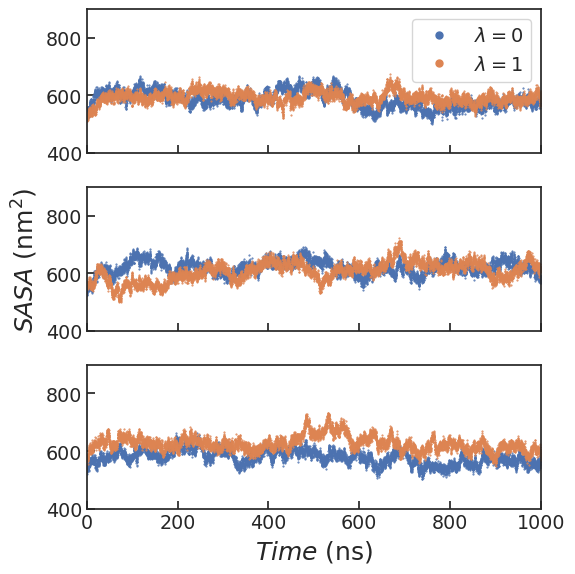

In [34]:
proot= 'GGFGG'
ff = 'amber99sb-star-ildnTRUE'
wat = 'tip3p' 
soup = "soup"

fig, ax = plt.subplots(3,1, figsize=(6,6), sharex=True, sharey=True)
for rep in range(3):
    for lmbd in [0,1]:        
        file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%i_npt_sasa.xvg"%(proot, soup, ff, wat, rep, lmbd)
        try:
            data = np.loadtxt(file, comments=["#", "@"])
            ax[rep].plot(data[:,0]*1e-3, data[:,1], '.', ms=1, label='$\lambda=%i$'%lmbd)
        except Exception as e:
            print (e)
ax[1].set_ylabel(r'$SASA$ (nm$^2$)', fontsize=18)
ax[-1].set_xlabel(r'$Time$ (ns)', fontsize=18)        
lgnd = ax[0].legend(loc=1, fontsize=14)
lgnd.legend_handles[0].set_markersize(10); lgnd.legend_handles[1].set_markersize(10); 
ax[-1].set_xlim(0, 1e6*1e-3)
ax[0].set_ylim(400,900)
plt.tight_layout()
plt.savefig("figures/GGFGG_%s_%s_%s_sasa.png"%(soup, ff, wat))

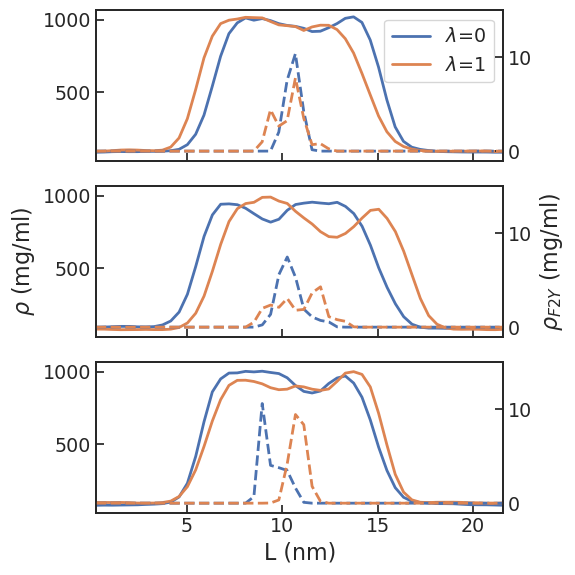

In [35]:
proot = 'GGFGG'
ff = 'amber99sb-star-ildnTRUE'
wat = 'tip3p' 
fig, ax = plt.subplots(3,1,figsize=(6,6), sharex=True, sharey=True)

for rep in range(3): 
    axt = ax[rep].twinx()
    for i in [0,1]:
        file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_density.xvg"%(proot, soup, ff, wat, rep, i)
        try:
            data = np.loadtxt(file, comments=["#", "@"])
            ax[rep].plot(data[:,0], data[:,1], '-', lw=2
                , color='C%i'%i, label=r'$\lambda$=%g'%i)
        except Exception as e:
            print (e)
        
        file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_densityF2Y.xvg"%(proot, soup, ff, wat, rep, i)
        try:
            data = np.loadtxt(file, comments=["#", "@"])
            axt.plot(data[:,0], data[:,1], '--', lw=2
                    , color='C%i'%i)
        except Exception as e:
            print (e)
        axt.set_ylim(-1,15)
        ax[rep].set_xlim(data[0,0], data[-1,0])
    if rep == 1:
        ax[rep].set_ylabel(r'$\rho$ (mg/ml)', fontsize=16)
        axt.set_ylabel(r'$\rho_{F2Y}$ (mg/ml)', fontsize=16)
        #ax.set_xlim(0,traj.time[-1])
#    ax[lmbda][-1].set_xlim(-180,180)
    #ax[lmbda][-1].set_ylim(-180,180)
#    ax[lmbda][-1].xaxis.set_ticks(range(-180,181,90))
    #ax[lmbda][-1].yaxis.set_ticks(range(-180,181,90))
    #plt.suptitle("%s"%prot.replace("F","(F2Y)"), fontsize=14)
ax[0].legend(loc=1)
ax[rep].set_xlabel('L (nm)', fontsize=16)
plt.tight_layout()
plt.savefig("figures/GGFGG_%s_%s_%s_density.png"%(soup, ff, wat), dpi=300, \
                transparent=True)

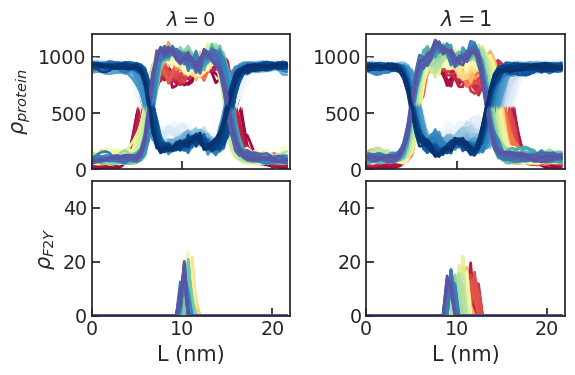

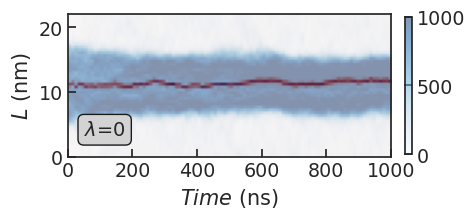

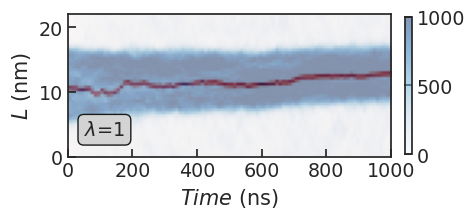

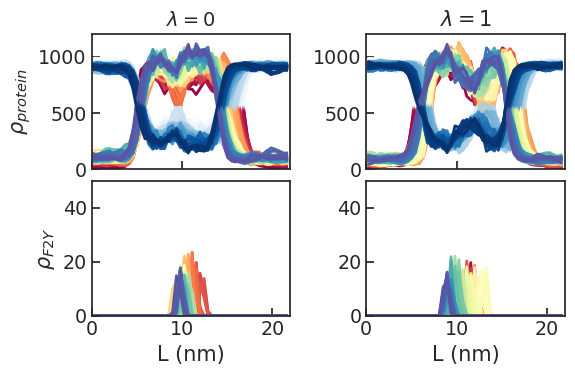

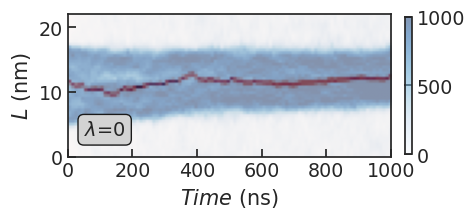

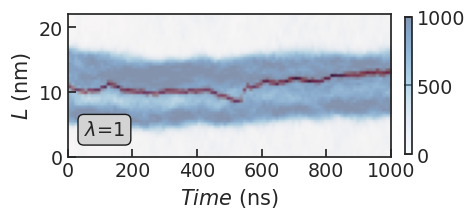

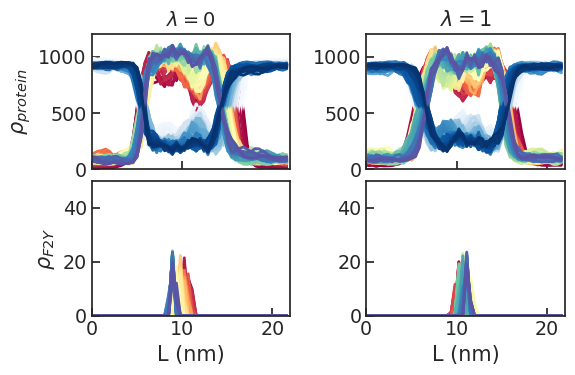

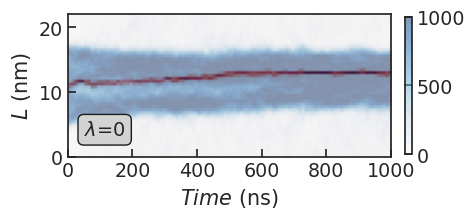

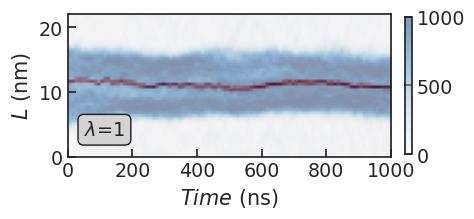

In [36]:
proot = 'GGFGG'
ff = 'amber99sb-star-ildnTRUE'
wat = 'tip3p'
for rep in range(3):
    fig, ax = plt.subplots(2,2, figsize=(6,4), sharex=True)
    for i in [0,1]:
        data = []
        dataH2O = []
        dataF2Y = []
        for k in range(100):
            file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_density_bin%i.xvg"%(proot, soup, ff, wat, rep, i, k)
            try:
                data.append(np.loadtxt(file, comments=["#", "@"]))
                ax[0][i].plot(data[-1][:,0], data[-1][:,1], '-', lw=2, color=plt.cm.Spectral(k/100))
            except Exception as e:
                print (e)
                break

            file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_densityH2O_bin%i.xvg"%(proot, soup,ff, wat, rep, i, k)
            try:
                dataH2O.append(np.loadtxt(file, comments=["#", "@"]))
                ax[0][i].plot(dataH2O[-1][:,0], dataH2O[-1][:,1], '-', lw=2, color=plt.cm.Blues(k/100))
            except Exception as e:
                print (e)
                break
            
            file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_densityF2Y_bin%i.xvg"%(proot, soup, ff, wat, rep, i, k)
            try:
                dataF2Y.append(np.loadtxt(file, comments=["#", "@"]))
                ax[1][i].plot(dataF2Y[-1][:,0], dataF2Y[-1][:,1], lw=2, color=plt.cm.Spectral(k/100))
            except Exception as e:
                print (e)
                break
            
        ax[0][i].set_ylim(0,1200); ax[1][i].set_ylim(0,50)

        figim, axim = plt.subplots(figsize=(5,4))
        axim.imshow(np.vstack([x[:,1] for x in dataF2Y]).transpose(),  extent=[0,(k+1)*10, 0, 22], \
              alpha=1, cmap='Reds')
        im = axim.imshow(np.vstack([x[:,1] for x in data]).transpose(), extent=[0,(k+1)*10, 0, 22],\
              alpha=0.5, cmap='Blues', vmin=0, vmax=1000)
        
        axim.set_aspect(20)
        axim.set_xlabel('$Time$ (ns)')
        axim.set_ylabel('$L$ (nm)')

        axim.text(0.05,0.15, r'$\lambda$=%g'%i, fontsize=14, transform=axim.transAxes, \
                      bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))

        figim.colorbar(im,fraction=0.02, pad=0.04)
        figim.tight_layout()
        figim.savefig("figures/%s_%s_XXXL_%s_%s_rep%i_l%i_density.png"%(proot, soup, ff, wat, rep, i), \
                    dpi=300, transparent=True)

    ax[i][-1].set_xlim(0,22)
    ax[0][0].set_title(r'$\lambda=%i$'%0, fontsize=14); ax[0][1].set_title(r'$\lambda=%i$'%1); 
    ax[-1][0].set_xlabel('L (nm)'); ax[-1][1].set_xlabel('L (nm)')
    ax[0][0].set_ylabel(r'$\rho_{protein}$'); ax[1][0].set_ylabel(r'$\rho_{F2Y}$')
    fig.tight_layout(h_pad=0)

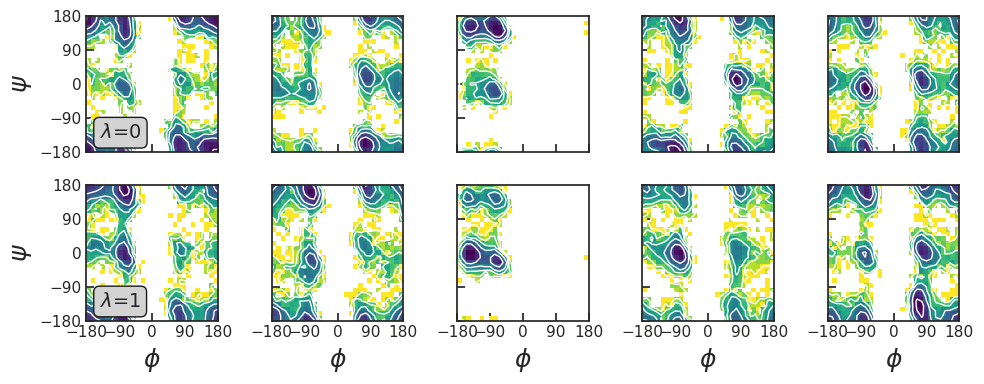

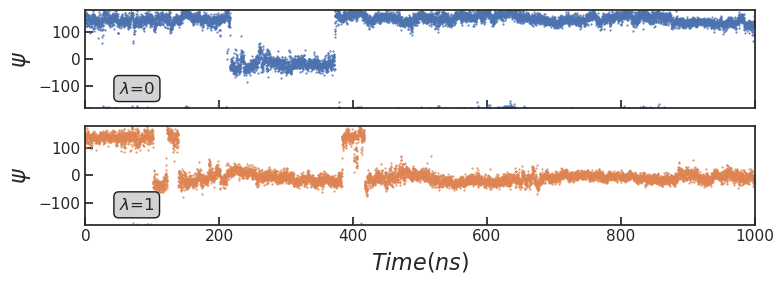

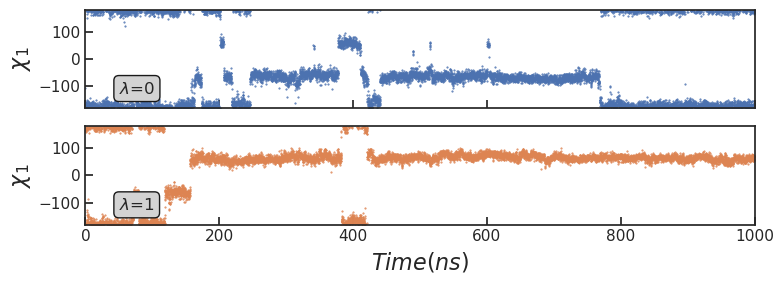

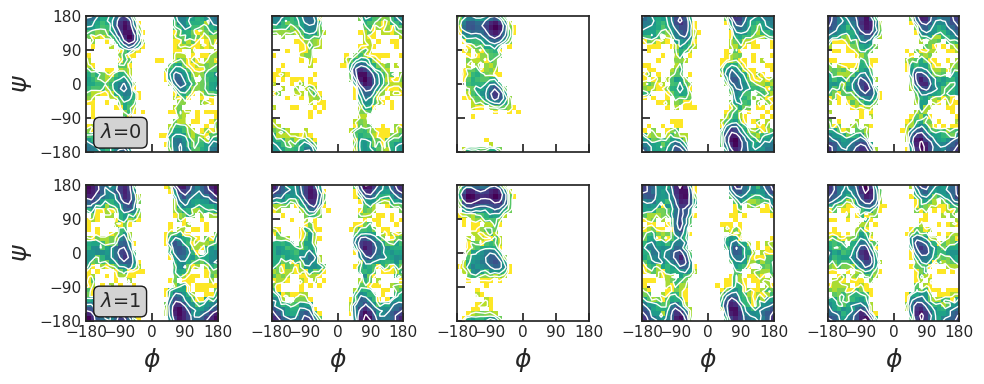

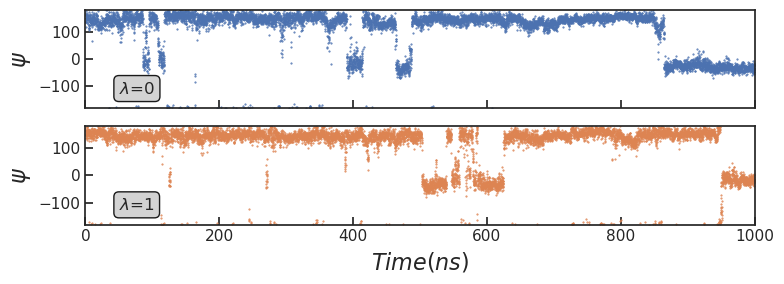

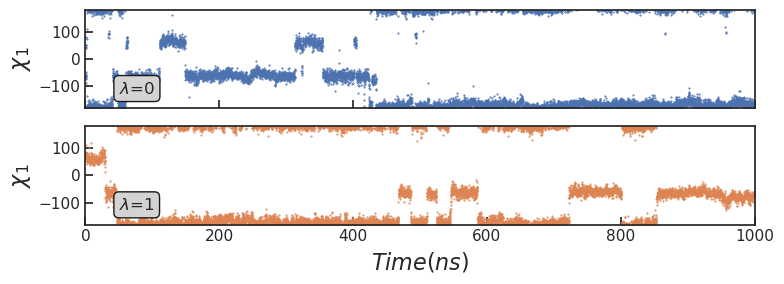

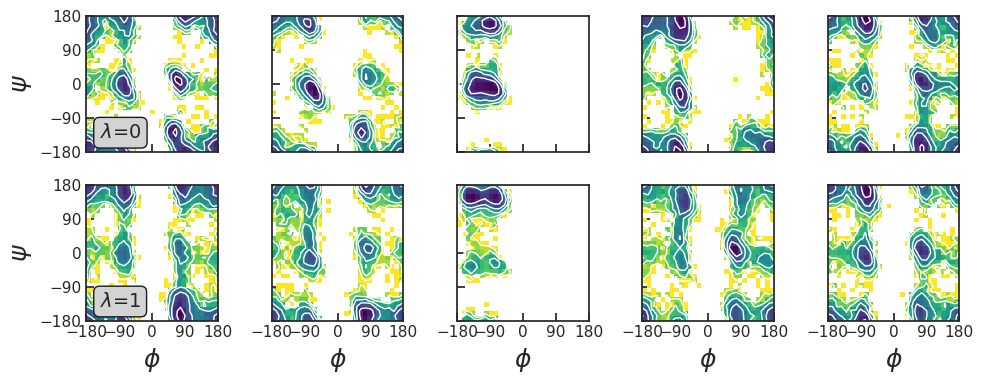

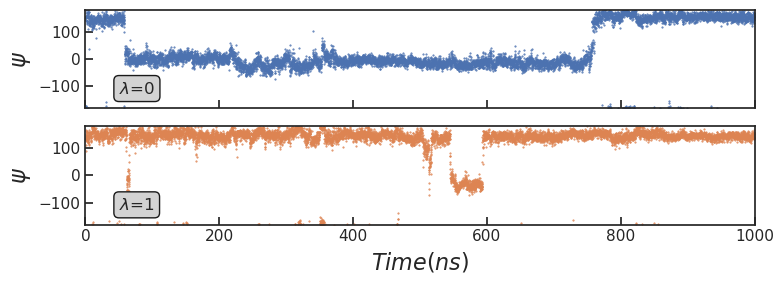

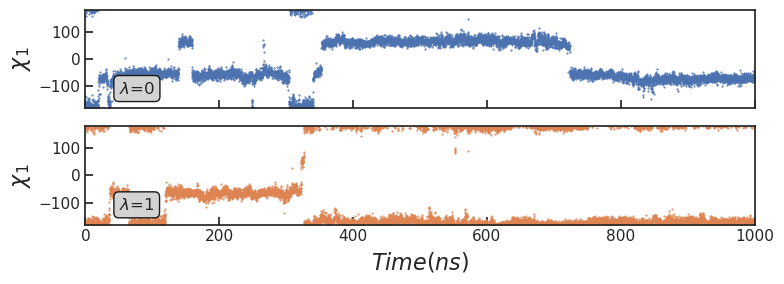

In [37]:
sns.set(style="ticks", color_codes=True, font_scale=1.)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

for rep in range(3):
    fig, ax = plt.subplots(2,5, figsize=(10,4), sharex=True, sharey=True)
    figg, axx = plt.subplots(2,1, figsize=(8,3), sharex=True, sharey=True)
    figgg, axxx = plt.subplots(2,1, figsize=(8,3), sharex=True, sharey=True)
    for lmbda in [0, 1]:
        pdb = "../data/%s_%s_XXXL_%s_%s_rep%g_l%i_npt_berendsen.gro"%(proot, soup, ff, wat, rep, lmbda)
        traj_pdb = md.load(pdb)
        atom_indices = traj_pdb.top.select("residue 1 to 7")
        
        xtc = "../data/%s_%s_XXXL_%s_%s_rep%g_l%i_npt_proc.xtc"%(proot, soup, ff, wat, rep, lmbda)

        traj = md.load_xtc(xtc, top=pdb, atom_indices=atom_indices)
        phi = md.compute_phi(traj)
        psi = md.compute_psi(traj)
        chi1= md.compute_chi1(traj)
        for k in range(5):
            counts, ybins, xbins, image = ax[lmbda][k].hist2d(180./np.pi*phi[1][:,k],180./np.pi*psi[1][:,k], \
                bins=[np.linspace(-180,180,30), np.linspace(-180,180,30)], \
                cmap='viridis_r', \
                norm=mpl.colors.LogNorm(), density=True)
            ax[lmbda][k].contour(np.transpose(counts), extent=[xbins.min(), xbins.max(), ybins.min(), ybins.max()], \
                  linewidths=1, levels = [1e-6, 3e-6, 1e-5, 3e-5, 1e-4], colors='white')
#            ax[lmbda][k].text(0.75, 0.8, "$%s_%g$"%(prot[k],k+1), fontsize=12, transform=ax[lmbda][k].transAxes)
        ax[lmbda][0].text(0.1,0.1, r'$\lambda$=%g'%lmbda, fontsize=14, transform=ax[lmbda][0].transAxes, \
                          bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))
        ax[lmbda][0].set_ylabel(r'$\psi$', fontsize=18)        

        axx[lmbda].plot(traj.time*1e-3, psi[1][:,2]*180/np.pi, '.' , ms=1, c='C%i'%lmbda, label=r'$\lambda$=%g'%lmbda)
        axx[lmbda].text(0.05,0.15, r'$\lambda$=%g'%lmbda, fontsize=12, transform=axx[lmbda].transAxes, \
                          bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))

        axxx[lmbda].plot(traj.time*1e-3, chi1[1][:,0]*180/np.pi, '.' , ms=1, c='C%i'%lmbda, label=r'$\lambda$=%g'%lmbda)
        axxx[lmbda].text(0.05,0.15, r'$\lambda$=%g'%lmbda, fontsize=12, transform=axxx[lmbda].transAxes, \
                          bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))
        
    axx[0].set_ylabel(r'$\psi$', fontsize=16); axx[1].set_ylabel(r'$\psi$', fontsize=16)
    
    axx[-1].set_xlabel(r'$Time (ns)$', fontsize=16)
    axx[0].set_ylim(-180,180); axx[0].set_xlim(0,1000)
    figg.tight_layout()
    figg.savefig("figures/%s_%s_XXXL_%s_%s_rep%i_l%i_phipsi.png"%(proot, soup, ff, wat, rep, i), \
            dpi=300, transparent=True)

    axxx[0].set_ylabel(r'$\chi_1$', fontsize=16); axxx[1].set_ylabel(r'$\chi_1$', fontsize=16)
    axxx[-1].set_xlabel(r'$Time (ns)$', fontsize=16)
    axxx[0].set_ylim(-180,180); axxx[0].set_xlim(0,1000)
    figgg.tight_layout()
    figgg.savefig("figures/%s_%s_XXXL_%s_%s_rep%i_l%i_chi1.png"%(proot, soup, ff, wat, rep, i), \
            dpi=300, transparent=True)

    [ax[1][k].set_xlabel(r'$\phi$', fontsize=18) for k in range(5)]
    ax[lmbda][-1].set_xlim(-180,180)
    ax[lmbda][-1].set_ylim(-180,180)
    ax[lmbda][-1].xaxis.set_ticks(range(-180,181,90))
    ax[lmbda][-1].yaxis.set_ticks(range(-180,181,90))
    fig.tight_layout()
    fig.savefig("figures/%s_%s_XXXL_%s_%s_rep%i_l%i_rama.png"%(proot, soup, ff, wat, rep, i), \
            dpi=300, transparent=True)


 ### Figures for paper

In [42]:
sns.set(style="ticks", color_codes=True, font_scale=1.25)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_72361/1853795463.py:12: SyntaxWarning: invalid escape sequence '\l'
  ax.plot(data[:,0]*1e-3, data[:,1], '.', ms=1, label='$\lambda=%i$'%lmbd)


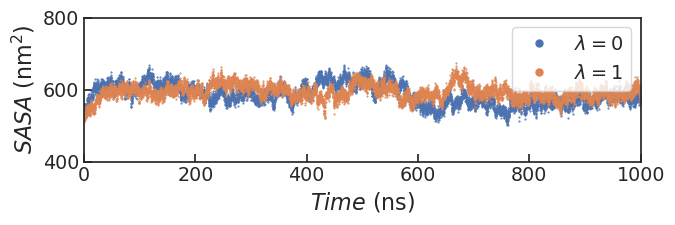

In [50]:
proot= 'GGFGG'
ff = 'amber99sb-star-ildnTRUE'
wat = 'tip3p' 
soup = "soup"

fig, ax = plt.subplots(figsize=(7,2.5), sharex=True, sharey=True)
rep = 0
for lmbd in [0,1]:        
    file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%i_npt_sasa.xvg"%(proot, soup, ff, wat, rep, lmbd)
    try:
        data = np.loadtxt(file, comments=["#", "@"])
        ax.plot(data[:,0]*1e-3, data[:,1], '.', ms=1, label='$\lambda=%i$'%lmbd)
    except Exception as e:
        print (e)
ax.set_ylabel(r'$SASA$ (nm$^2$)', fontsize=16)
ax.set_xlabel(r'$Time$ (ns)', fontsize=16)        
lgnd = ax.legend(loc=1, fontsize=14)
lgnd.legend_handles[0].set_markersize(10); lgnd.legend_handles[1].set_markersize(10); 
ax.set_xlim(0, 1e6*1e-3)
ax.set_ylim(400,800)
plt.tight_layout()
plt.savefig("figures/GGFGG_%s_%s_%s_sasa_paper.png"%(soup, ff, wat), transparent=True)

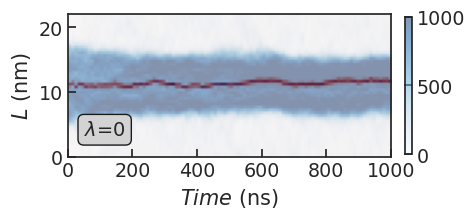

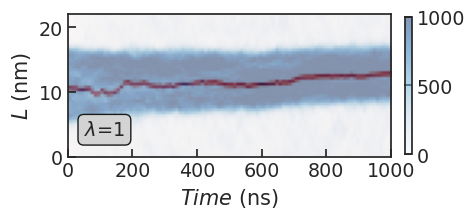

In [46]:
for i in [0,1]:
    data = []
    dataH2O = []
    dataF2Y = []
    for k in range(100):
        file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_density_bin%i.xvg"%(proot, soup, ff, wat, rep, i, k)
        try:
            data.append(np.loadtxt(file, comments=["#", "@"]))
        except Exception as e:
            print (e)
            break

        file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_densityH2O_bin%i.xvg"%(proot, soup,ff, wat, rep, i, k)
        try:
            dataH2O.append(np.loadtxt(file, comments=["#", "@"]))
        except Exception as e:
            print (e)
            break
        
        file = "../analysis/%s_%s_XXXL_%s_%s_rep%i_l%g_npt_densityF2Y_bin%i.xvg"%(proot, soup, ff, wat, rep, i, k)
        try:
            dataF2Y.append(np.loadtxt(file, comments=["#", "@"]))
        except Exception as e:
            print (e)
            break
        
    figim, axim = plt.subplots(figsize=(5,4))
    axim.imshow(np.vstack([x[:,1] for x in dataF2Y]).transpose(),  extent=[0,(k+1)*10, 0, 22], \
          alpha=1, cmap='Reds')
    im = axim.imshow(np.vstack([x[:,1] for x in data]).transpose(), extent=[0,(k+1)*10, 0, 22],\
          alpha=0.5, cmap='Blues', vmin=0, vmax=1000)

    axim.set_aspect(20)
    axim.set_xlabel('$Time$ (ns)')
    axim.set_ylabel('$L$ (nm)')

    axim.text(0.05,0.15, r'$\lambda$=%g'%i, fontsize=14, transform=axim.transAxes, \
              bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))

    figim.colorbar(im,fraction=0.02, pad=0.04)
    figim.tight_layout()
    figim.savefig("figures/%s_%s_XXXL_%s_%s_rep%i_l%i_density_paper.png"%(proot, soup, ff, wat, rep, i), \
                dpi=300, transparent=True)


<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_4038466/4095393151.py:11: SyntaxWarning: invalid escape sequence '\l'
  ax.plot(data[:,0]*1e-3, data[:,1], '.', ms=1, label='$\lambda=%i$'%lmbd)


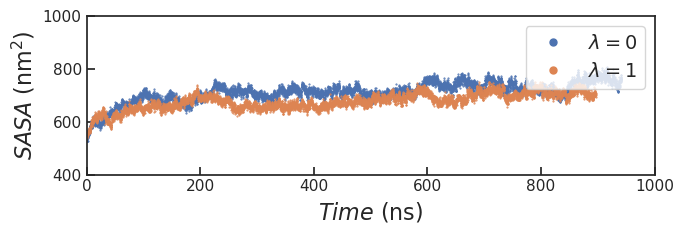

In [41]:
proot= 'GGFGG'
ff = 'amber99sb-star-ildnTRUE'
wat = 'tip4pew' 
soup = "soup"

fig, ax = plt.subplots(figsize=(7,2.5), sharex=True, sharey=True)
for lmbd in [0,1]:        
    file = "../analysis/%s_%s_XXXL_%s_%s_l%i_npt_sasa.xvg"%(proot, soup, ff, wat, lmbd)
    try:
        data = np.loadtxt(file, comments=["#", "@"])
        ax.plot(data[:,0]*1e-3, data[:,1], '.', ms=1, label='$\lambda=%i$'%lmbd)
    except Exception as e:
        print (e)
ax.set_ylabel(r'$SASA$ (nm$^2$)', fontsize=16)
ax.set_xlabel(r'$Time$ (ns)', fontsize=16)        
lgnd = ax.legend(loc=1, fontsize=14)
lgnd.legend_handles[0].set_markersize(10); lgnd.legend_handles[1].set_markersize(10); 
ax.set_xlim(0, 1e6*1e-3)
ax.set_ylim(400,1000)
plt.tight_layout()
plt.savefig("figures/GGFGG_%s_%s_%s_sasa_paper.png"%(soup, ff, wat), transparent=True)

../analysis/GGFGG_soup_XXXL_amber99sb-star-ildnTRUE_tip4pew_l0_npt_density_bin95.xvg not found.
../analysis/GGFGG_soup_XXXL_amber99sb-star-ildnTRUE_tip4pew_l1_npt_density_bin90.xvg not found.


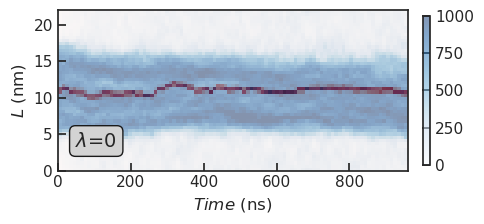

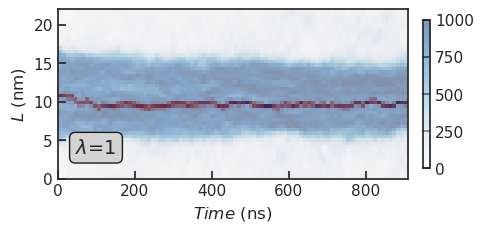

In [49]:
for i in [0,1]:
    data = []
    dataH2O = []
    dataF2Y = []
    for k in range(100):
        file = "../analysis/%s_%s_XXXL_%s_%s_l%g_npt_density_bin%i.xvg"%(proot, soup, ff, wat, i, k)
        try:
            data.append(np.loadtxt(file, comments=["#", "@"]))
        except Exception as e:
            print (e)
            break

        file = "../analysis/%s_%s_XXXL_%s_%s_l%g_npt_densityH2O_bin%i.xvg"%(proot, soup,ff, wat,i, k)
        try:
            dataH2O.append(np.loadtxt(file, comments=["#", "@"]))
        except Exception as e:
            print (e)
            break
        
        file = "../analysis/%s_%s_XXXL_%s_%s_l%g_npt_densityF2Y_bin%i.xvg"%(proot, soup, ff, wat, i, k)
        try:
            dataF2Y.append(np.loadtxt(file, comments=["#", "@"]))
        except Exception as e:
            print (e)
            break
        
    figim, axim = plt.subplots(figsize=(5,4))
    axim.imshow(np.vstack([x[:,1] for x in dataF2Y]).transpose(),  extent=[0,(k+1)*10, 0, 22], \
          alpha=1, cmap='Reds')
    im = axim.imshow(np.vstack([x[:,1] for x in data]).transpose(), extent=[0,(k+1)*10, 0, 22],\
          alpha=0.5, cmap='Blues', vmin=0, vmax=1000)

    axim.set_aspect(20)
    axim.set_xlabel('$Time$ (ns)')
    axim.set_ylabel('$L$ (nm)')

    axim.text(0.05,0.15, r'$\lambda$=%g'%i, fontsize=14, transform=axim.transAxes, \
              bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))

    figim.colorbar(im,fraction=0.02, pad=0.04)
    figim.tight_layout()
    figim.savefig("figures/%s_%s_XXXL_%s_%s_l%i_density_paper.png"%(proot, soup, ff, wat, i), \
                dpi=300, transparent=True)


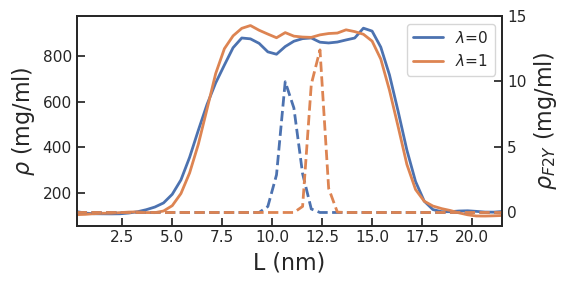

In [45]:
 
fig, ax = plt.subplots(figsize=(6,3), sharex=True, sharey=True)
axt = ax.twinx()
for i in [0,1]:
    file = "../analysis/%s_%s_XXXL_%s_%s_l%g_npt_density.xvg"%(proot, soup, ff, wat, i)
    try:
        data = np.loadtxt(file, comments=["#", "@"])
        ax.plot(data[:,0], data[:,1], '-', lw=2
            , color='C%i'%i, label=r'$\lambda$=%g'%i)
    except Exception as e:
        print (e)
        
    file = "../analysis/%s_%s_XXXL_%s_%s_l%g_npt_densityF2Y.xvg"%(proot, soup, ff, wat, i)
    try:
        data = np.loadtxt(file, comments=["#", "@"])
        axt.plot(data[:,0], data[:,1], '--', lw=2
              , color='C%i'%i)
    except Exception as e:
        print (e)
    axt.set_ylim(-1,15)
    ax.set_xlim(data[0,0], data[-1,0])
ax.set_ylabel(r'$\rho$ (mg/ml)', fontsize=16)
axt.set_ylabel(r'$\rho_{F2Y}$ (mg/ml)', fontsize=16)
ax.legend(loc=1)
ax.set_xlabel('L (nm)', fontsize=16)
plt.tight_layout()
plt.savefig("figures/GGFGG_%s_%s_%s_density.png"%(soup,ff, wat), dpi=300, \
                transparent=True)

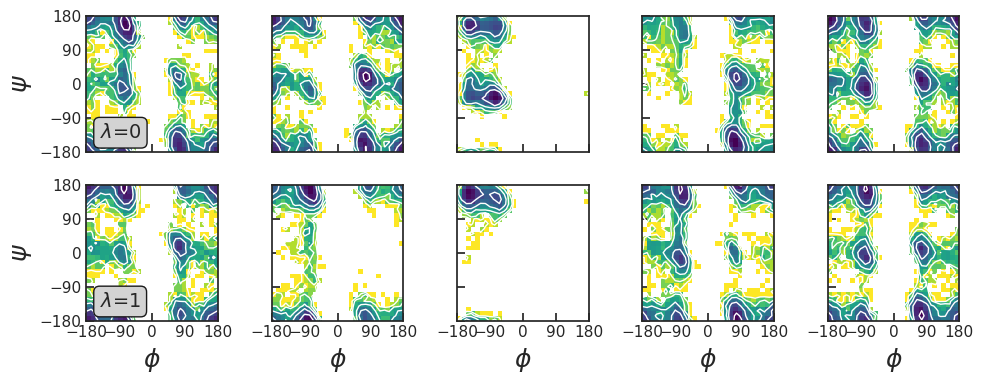

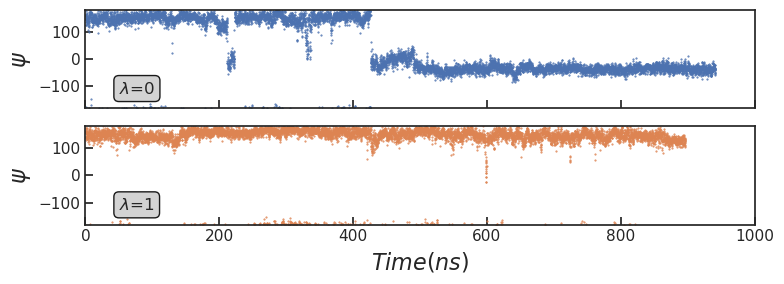

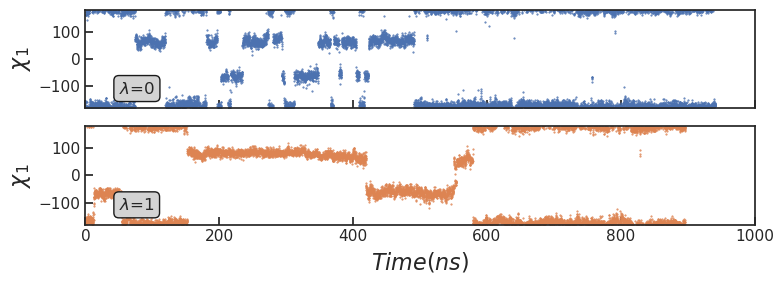

In [48]:
sns.set(style="ticks", color_codes=True, font_scale=1.)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

fig, ax = plt.subplots(2,5, figsize=(10,4), sharex=True, sharey=True)
figg, axx = plt.subplots(2,1, figsize=(8,3), sharex=True, sharey=True)
figgg, axxx = plt.subplots(2,1, figsize=(8,3), sharex=True, sharey=True)
for lmbda in [0, 1]:
    pdb = "../data/%s_%s_XXXL_%s_%s_l%i_npt_berendsen.gro"%(proot, soup, ff, wat, lmbda)
    traj_pdb = md.load(pdb)
    atom_indices = traj_pdb.top.select("residue 1 to 7")
    
    xtc = "../data/%s_%s_XXXL_%s_%s_l%i_npt_proc.xtc"%(proot, soup, ff, wat, lmbda)

    traj = md.load_xtc(xtc, top=pdb, atom_indices=atom_indices)
    phi = md.compute_phi(traj)
    psi = md.compute_psi(traj)
    chi1= md.compute_chi1(traj)
    for k in range(5):
        counts, ybins, xbins, image = ax[lmbda][k].hist2d(180./np.pi*phi[1][:,k],180./np.pi*psi[1][:,k], \
            bins=[np.linspace(-180,180,30), np.linspace(-180,180,30)], \
            cmap='viridis_r', \
            norm=mpl.colors.LogNorm(), density=True)
        ax[lmbda][k].contour(np.transpose(counts), extent=[xbins.min(), xbins.max(), ybins.min(), ybins.max()], \
              linewidths=1, levels = [1e-6, 3e-6, 1e-5, 3e-5, 1e-4], colors='white')
        #ax[lmbda][k].text(0.75, 0.8, "$%s_%g$"%(prot[k],k+1), fontsize=12, transform=ax[lmbda][k].transAxes)
    ax[lmbda][0].text(0.1,0.1, r'$\lambda$=%g'%lmbda, fontsize=14, transform=ax[lmbda][0].transAxes, \
                      bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))
    ax[lmbda][0].set_ylabel(r'$\psi$', fontsize=18)        

    axx[lmbda].plot(traj.time*1e-3, psi[1][:,2]*180/np.pi, '.' , ms=1, c='C%i'%lmbda, label=r'$\lambda$=%g'%lmbda)
    axx[lmbda].text(0.05,0.15, r'$\lambda$=%g'%lmbda, fontsize=12, transform=axx[lmbda].transAxes, \
                      bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))

    axxx[lmbda].plot(traj.time*1e-3, chi1[1][:,0]*180/np.pi, '.' , ms=1, c='C%i'%lmbda, label=r'$\lambda$=%g'%lmbda)
    axxx[lmbda].text(0.05,0.15, r'$\lambda$=%g'%lmbda, fontsize=12, transform=axxx[lmbda].transAxes, \
                      bbox=dict(edgecolor='k', facecolor='lightgray', boxstyle='round'))
    
axx[0].set_ylabel(r'$\psi$', fontsize=16); axx[1].set_ylabel(r'$\psi$', fontsize=16)

axx[-1].set_xlabel(r'$Time (ns)$', fontsize=16)
axx[0].set_ylim(-180,180); axx[0].set_xlim(0,1000)
figg.tight_layout()
figg.savefig("figures/%s_%s_XXXL_%s_%s_l%i_phipsi.png"%(proot, soup, ff, wat, i), \
        dpi=300, transparent=True)

axxx[0].set_ylabel(r'$\chi_1$', fontsize=16); axxx[1].set_ylabel(r'$\chi_1$', fontsize=16)
axxx[-1].set_xlabel(r'$Time (ns)$', fontsize=16)
axxx[0].set_ylim(-180,180); axxx[0].set_xlim(0,1000)
figgg.tight_layout()
figgg.savefig("figures/%s_%s_XXXL_%s_%s_l%i_chi1.png"%(proot, soup, ff, wat, i), \
        dpi=300, transparent=True)

[ax[1][k].set_xlabel(r'$\phi$', fontsize=18) for k in range(5)]
ax[lmbda][-1].set_xlim(-180,180)
ax[lmbda][-1].set_ylim(-180,180)
ax[lmbda][-1].xaxis.set_ticks(range(-180,181,90))
ax[lmbda][-1].yaxis.set_ticks(range(-180,181,90))
fig.tight_layout()
fig.savefig("figures/%s_%s_XXXL_%s_%s_l%i_rama.png"%(proot, soup, ff, wat, i), \
        dpi=300, transparent=True)
